In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [7]:
img_info,object_tbl,bb_info,hit_info = load_info()
object_lst = list(object_tbl.id)

In [8]:
bb_info

,object_id,worker_id,x_locs,y_locs
0,8,3,"[302, 264, 254, 250, 250, 250, 248, 247, 247, ...","[124, 131, 137, 145, 152, 160, 167, 173, 188, ..."
1,11,3,"[347, 383, 385, 380, 393, 414, 429, 429, 408, ...","[278, 321, 332, 341, 351, 357, 356, 338, 333, ..."
2,16,3,"[354, 353, 353, 361, 378, 390, 402, 409, 413, ...","[455, 434, 405, 381, 370, 370, 381, 393, 413, ..."
3,9,3,"[258, 258, 291, 303, 355, 349, 357, 363, 388, ...","[218, 270, 275, 289, 285, 279, 278, 283, 281, ..."
4,13,3,"[243, 181, 190, 224, 238, 247, 254, 268, 272, ...","[273, 345, 376, 398, 399, 400, 400, 404, 385, ..."
5,5,3,"[432, 437, 443, 456, 454, 474, 483, 483, 486, ...","[208, 195, 173, 168, 136, 130, 136, 142, 151, ..."
6,43,3,"[103, 94, 89, 96, 106, 118, 128, 136, 125, 137...","[432, 430, 441, 441, 446, 453, 453, 449, 476, ..."
7,4,3,"[91, 96, 93, 88, 85, 88, 108, 124, 134, 134, 1...","[335, 355, 381, 418, 444, 455, 462, 452, 442, ..."
8,37,3,"[522, 522, 517, 517, 528, 536, 544, 544, 541, ...","[225, 217, 210, 199, 192, 195, 204, 211, 218, ..."
9,3,3,"[47, 90, 97, 90, 86, 47, 52]","[319, 340, 360, 409, 422, 407, 340]"


In [4]:
for k in tqdm(range(1,21)):
    compute_PR_obj(2,majority_topk=k,PLOT_HEATMAP=True)

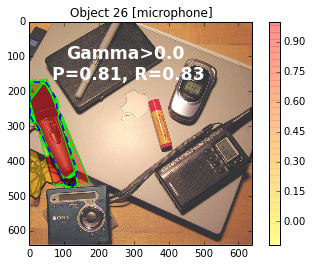

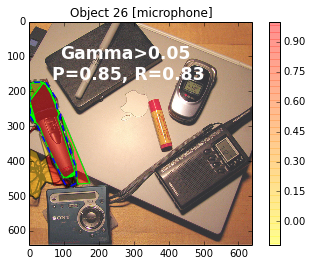

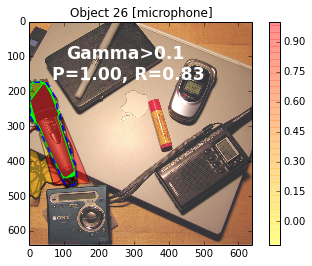

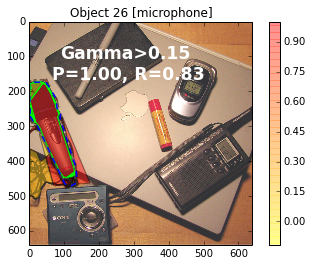

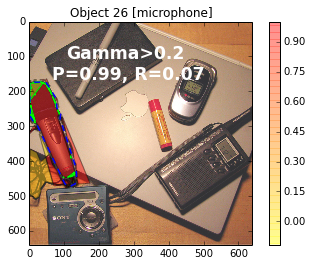

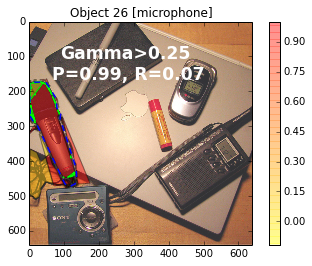

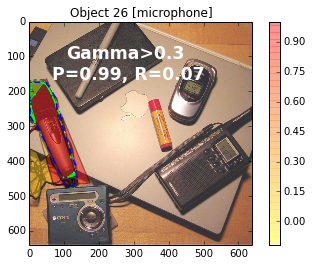

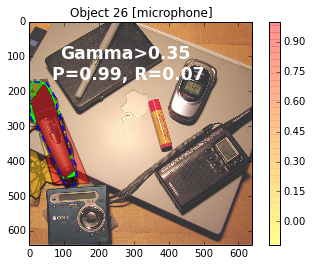

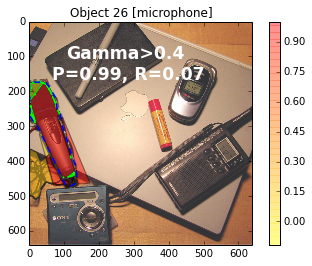

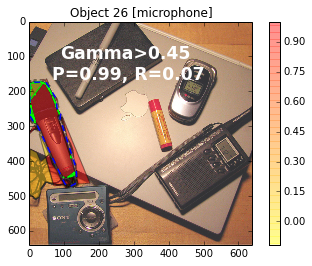

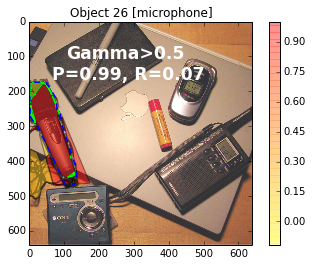

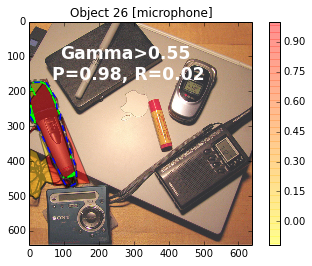

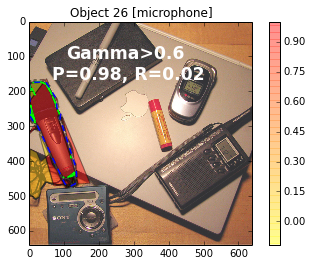

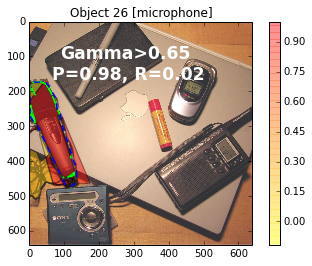

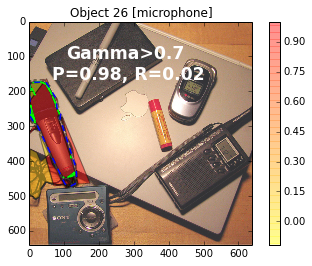

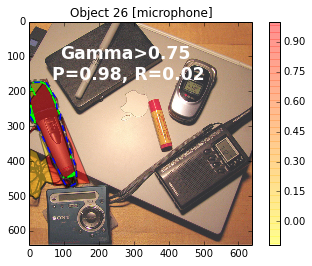

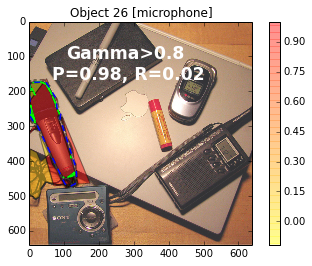

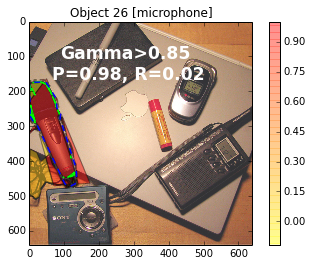

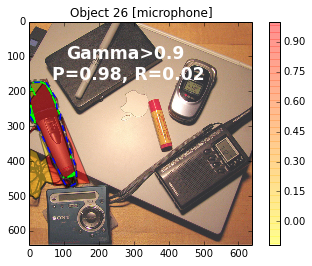

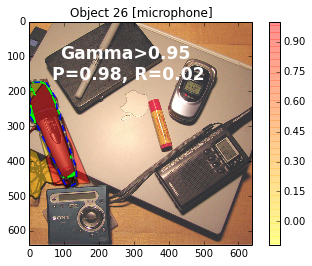

In [5]:
for threshold in np.linspace(0,0.95,20):
    compute_PR_obj(26,threshold=threshold,PLOT_HEATMAP=True)